# Regresja

In [216]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns

# podział danych na zbiory treningowe/walidacyjne/testowe
from sklearn.model_selection import train_test_split

# redukcja wymiarowości
from sklearn.decomposition import PCA

# model
from sklearn.linear_model import LinearRegression

#metryki
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [218]:
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [220]:
X = bike_data[['temp', 'atemp', 'hum', 'windspeed']].copy()
y = bike_data['rentals'].copy()

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

Nieskalowane dane


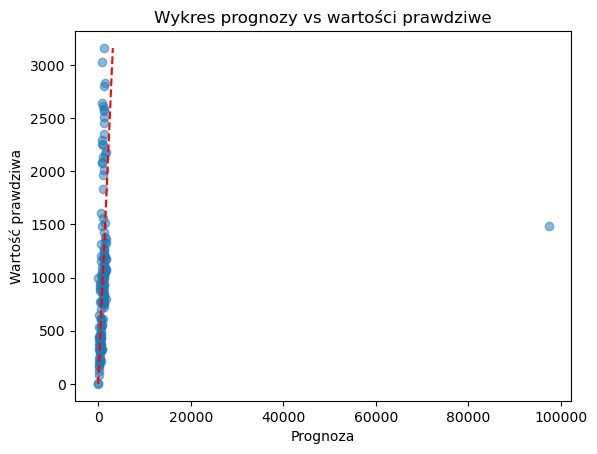

Skalowane dane


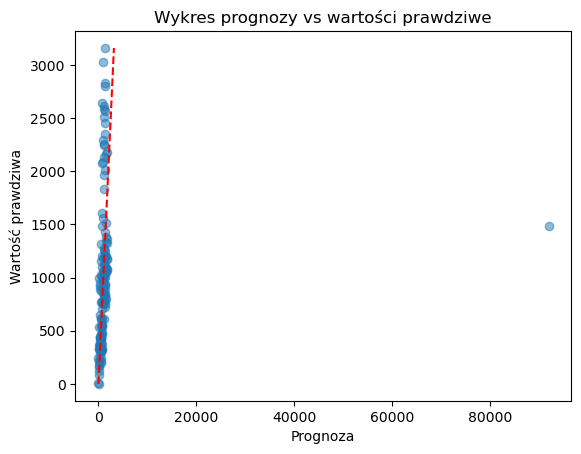

Cztery główne składowe


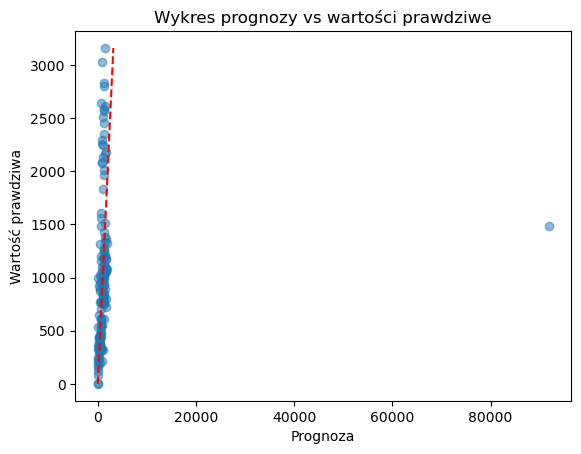

Trzy główne składowe


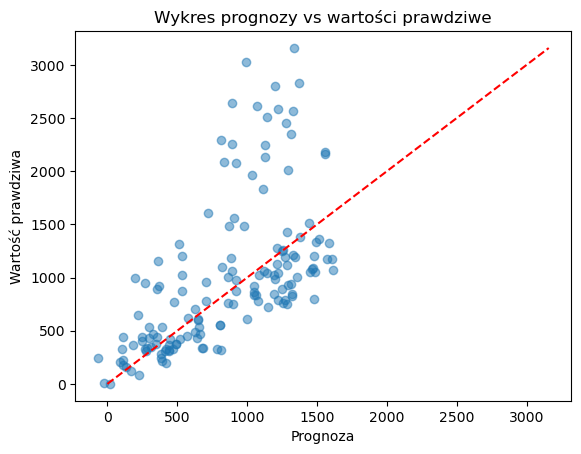

Dwie główne składowe


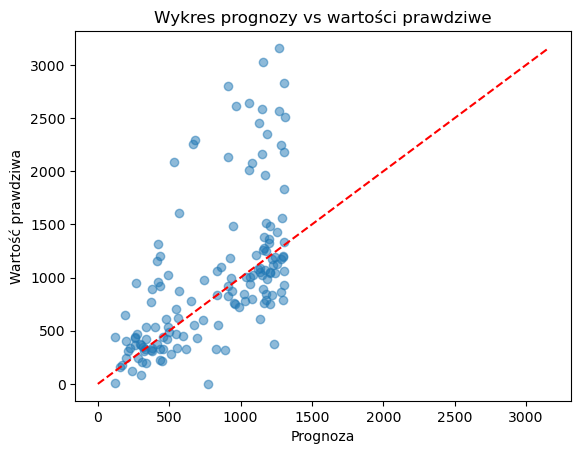

Jedna główna składowa


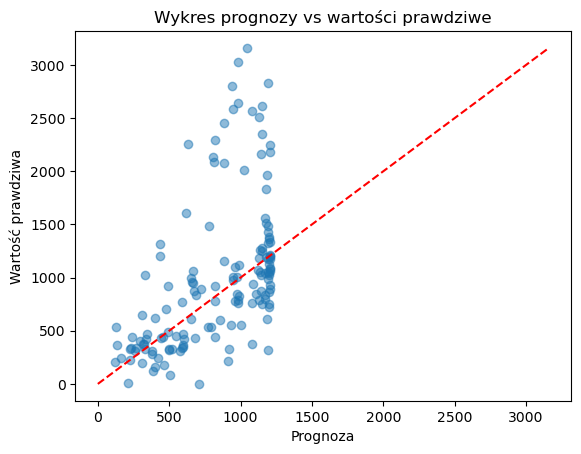

+-------------------+--------------------+-------------------+-------------------+--------------------------------+
|       Model       |      R2 score      |     RMSE train    |     RMSE test     | Czas trenowania (microseconds) |
+-------------------+--------------------+-------------------+-------------------+--------------------------------+
| Nieskalowane dane | 0.4323304785640494 | 509.8752835689533 | 7927.849372097497 |             34976              |
|   Skalowane dane  | 0.4319689505837274 |  510.037618197589 | 7480.277319787758 |              4997              |
|        4 PC       | 0.4233615284448088 | 513.8874103808588 | 7479.169102845755 |              3999              |
|        3 PC       | 0.4268578728523068 | 512.3271093566567 |  583.033188586621 |              3002              |
|        2 PC       | 0.3603273004235672 | 541.2464728591983 | 596.8911341716796 |              4996              |
|        1 PC       | 0.3035920417965162 | 564.7393295484752 | 622.27218

In [224]:
from prettytable import PrettyTable
import datetime

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    start = datetime.datetime.now()
    poly_transformer = PolynomialFeatures(degree=3)
    X_train_transformed = poly_transformer.fit_transform(Xtrain)
    X_test_transformed = poly_transformer.transform(Xtest)
    polynomial_regression = LinearRegression()
    polynomial_regression.fit(X_train_transformed, ytrain)
    prediction_train = polynomial_regression.predict(X_train_transformed)
    prediction_test = polynomial_regression.predict(X_test_transformed)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    R2_score =  r2_score(ytrain, prediction_train)
    RMSE_train = sqrt(mean_squared_error(ytrain, prediction_train))
    RMSE_test = sqrt(mean_squared_error(ytest, prediction_test))
    plt.scatter(prediction_test, ytest, alpha=0.5)
    plt.plot(np.arange(0, y_test.max()), np.arange(0, y_test.max()), color='red', linestyle='--')
    plt.title('Wykres prognozy vs wartości prawdziwe')
    plt.xlabel('Prognoza')
    plt.ylabel('Wartość prawdziwa')
    plt.show()
    return R2_score, RMSE_train, RMSE_test, time

results = PrettyTable(['Model',
                       'R2 score',
                       'RMSE train',
                       'RMSE test',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieprzetworzonym zbiorze
print('Nieskalowane dane')
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1], not_scaled_data[2], not_scaled_data[3]])

# Trenowanie modelu na przetworzonym zbiorze
print('Skalowane dane')
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1], scaled_data[2], scaled_data[3]])

# Trenowanie modelu na czterech głównych składowych
print('Cztery główne składowe')
PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1], PC4_data[2], PC4_data[3]])

# Trenowanie modelu na trzech głównych składowych
print('Trzy główne składowe')
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1], PC3_data[2], PC3_data[3]])

# Trenowanie modelu na dwóch głównych składowych
print('Dwie główne składowe')
PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1], PC2_data[2], PC2_data[3]])

# Trenowanie modelu na jednej głównej składowej
print('Jedna główna składowa')
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1],  y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1], PC1_data[2], PC1_data[3]])

print(results)

# Klasyfikacja

In [233]:
# model
from sklearn.linear_model import LogisticRegression

# metryki
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [236]:
penguins = pd.read_csv('penguins.csv')
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [246]:
penguins.dropna(inplace=True)
X = penguins[['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']].copy()
y = penguins['Species'].copy()

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

X_train_scaler = scaler.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_scaler)

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

Nieskalowane dane


C:\Users\tomas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


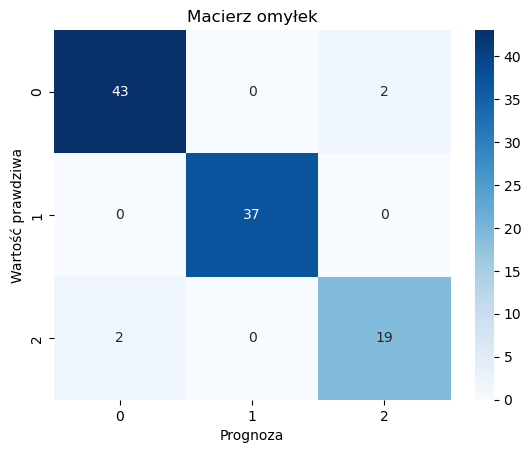

Skalowane dane


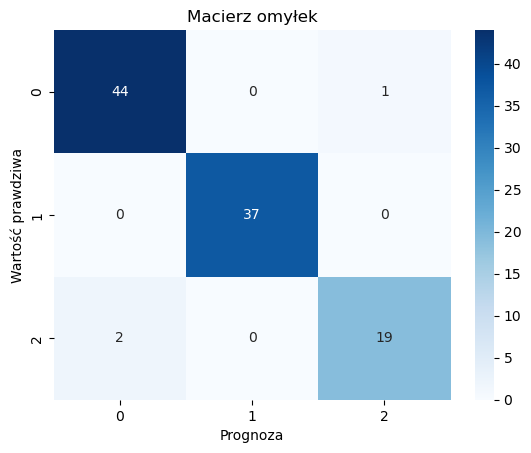

Cztery główne składowe


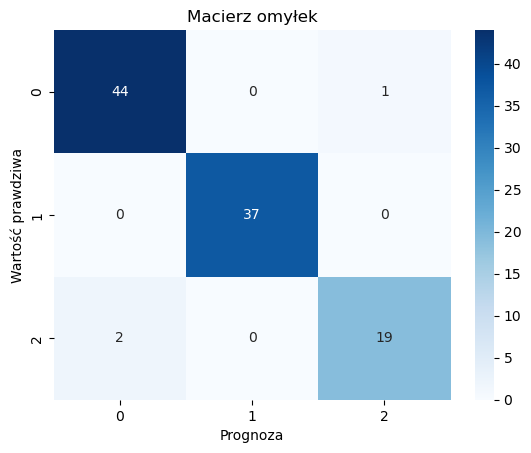

Trzy główne składowe


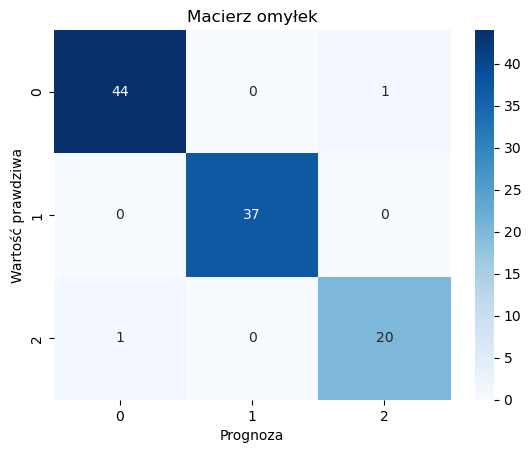

Dwie główne składowe


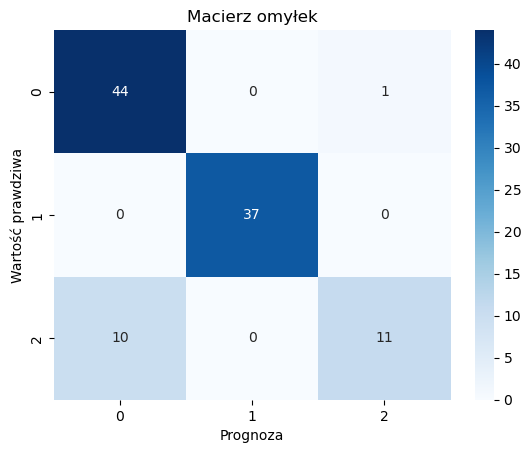

Jedna główna składowa


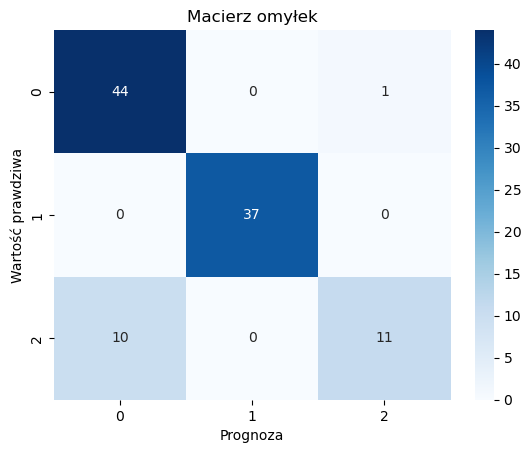

+-------------------+--------------------+--------------------------------+
|       Model       |      F1 score      | Czas trenowania (microseconds) |
+-------------------+--------------------+--------------------------------+
| Nieskalowane dane | 0.9534391534391534 |             48093              |
|   Skalowane dane  |  0.96462074510855  |              6994              |
|        4 PC       |  0.96462074510855  |              6993              |
|        3 PC       | 0.9767195767195768 |              7996              |
|        2 PC       | 0.8518518518518517 |              5997              |
|        1 PC       | 0.8518518518518517 |              7568              |
+-------------------+--------------------+--------------------------------+


In [261]:
def train_and_check(Xtrain, Xtest, ytrain, ytest):
    start = datetime.datetime.now()
    logistic_regression = LogisticRegression()
    logistic_regression.fit(Xtrain, ytrain)
    prediction_train = logistic_regression.predict(Xtrain)
    prediction_test = logistic_regression.predict(Xtest)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    f1_metric = f1_score(y_test, prediction_test, average='macro')
    plt.figure()
    cm = confusion_matrix(y_test, prediction_test)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Macierz omyłek')
    ax.set_xlabel('Prognoza')
    ax.set_ylabel('Wartość prawdziwa')
    plt.show()
    
    return f1_metric, time

results = PrettyTable(['Model',
                       'F1 score',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieprzetworzonym zbiorze
print('Nieskalowane dane')
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

# Trenowanie modelu na przetworzonym zbiorze
print('Skalowane dane')
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1]])

# Trenowanie modelu na czterech głównych składowych
print('Cztery główne składowe')
PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1]])

# Trenowanie modelu na trzech głównych składowych
print('Trzy główne składowe')
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])

# Trenowanie modelu na dwóch głównych składowych
print('Dwie główne składowe')
PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1]])

# Trenowanie modelu na jednej głównej składowej
print('Jedna główna składowa')
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1],  y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])

print(results)